In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotifydata/SpotifyFeatures.csv


In [3]:
# Importing Library
import pandas as pd

In [4]:
#Load Spotify Dataset 
spotify = pd.read_csv("/kaggle/input/spotifydata/SpotifyFeatures.csv")

In [5]:
# Preview the first few rows
print(spotify.shape)   # check rows & columns
print(spotify.columns) # check column names
spotify.head()

(232725, 18)
Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [6]:
# Check nulls
spotify.isnull().sum()


genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [7]:
# Check duplicates
spotify.duplicated().sum()

0

In [8]:
# Convert duration from ms to minutes
spotify["duration_min"] = spotify["duration_ms"] / 60000

In [9]:
#  genre & artist lowercase (for consistency)
spotify["genre"] = spotify["genre"].str.lower()
spotify["artist_name"] = spotify["artist_name"].str.lower()

In [10]:
#EDA Most Popular Genres
genre_popularity = spotify.groupby("genre")["popularity"].mean().sort_values(ascending=False)
print(genre_popularity.head(10))

genre
pop                 66.590667
rap                 60.533795
rock                59.619392
hip-hop             58.423131
dance               57.275256
indie               54.701561
children’s music    54.659040
r&b                 52.308719
alternative         50.213430
folk                49.940209
Name: popularity, dtype: float64


In [11]:
# Top Artist by Popularity EDA
top_artists = spotify.groupby("artist_name")["popularity"].mean().sort_values(ascending=False).head(10)
print(top_artists)

artist_name
pedro capó              87.000000
mario bautista          85.000000
mau y ricky             83.000000
kris kross amsterdam    82.000000
ninho                   82.000000
paloma mami             82.000000
martin garrix           81.857143
sofia reyes             81.500000
kenny man               81.000000
nsg                     81.000000
Name: popularity, dtype: float64


In [12]:
#Track Duration Trends
spotify["duration_min"].describe()   # avg, min, max song lengths

count    232725.000000
mean          3.918706
std           1.982265
min           0.256450
25%           3.047617
50%           3.673783
75%           4.429467
max          92.548617
Name: duration_min, dtype: float64

In [13]:
#Correlation Between Features
corr = spotify[["danceability","energy","valence","acousticness","popularity"]].corr()
print(corr)

              danceability    energy   valence  acousticness  popularity
danceability      1.000000  0.325807  0.547154     -0.364546    0.256564
energy            0.325807  1.000000  0.436771     -0.725576    0.248922
valence           0.547154  0.436771  1.000000     -0.325798    0.060076
acousticness     -0.364546 -0.725576 -0.325798      1.000000   -0.381295
popularity        0.256564  0.248922  0.060076     -0.381295    1.000000


<Axes: xlabel='valence', ylabel='energy'>

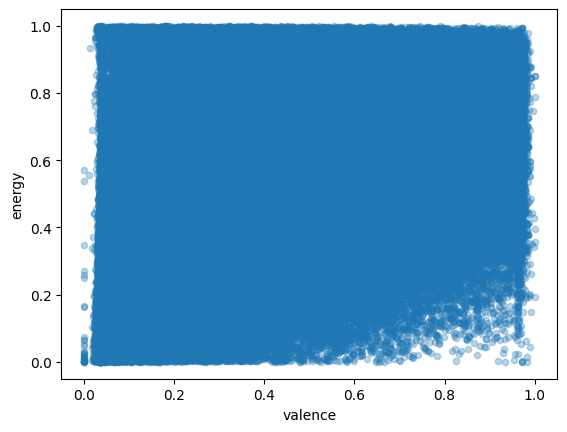

In [14]:
#Energy vs Valence 
spotify.plot.scatter(x="valence", y="energy", alpha=0.3)

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

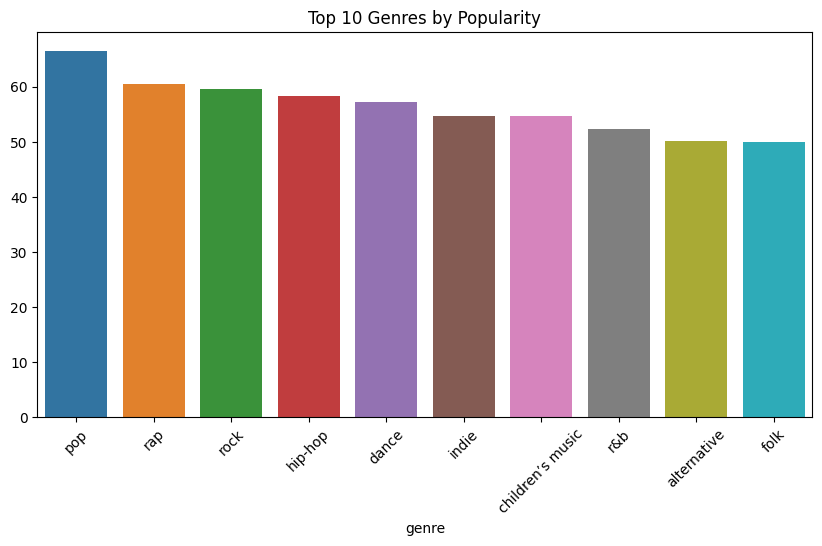

In [16]:
# Top 10 genres by average popularity
plt.figure(figsize=(10,5))
sns.barplot(x=genre_popularity.index[:10], y=genre_popularity.values[:10])
plt.title("Top 10 Genres by Popularity")
plt.xticks(rotation=45)
plt.show()

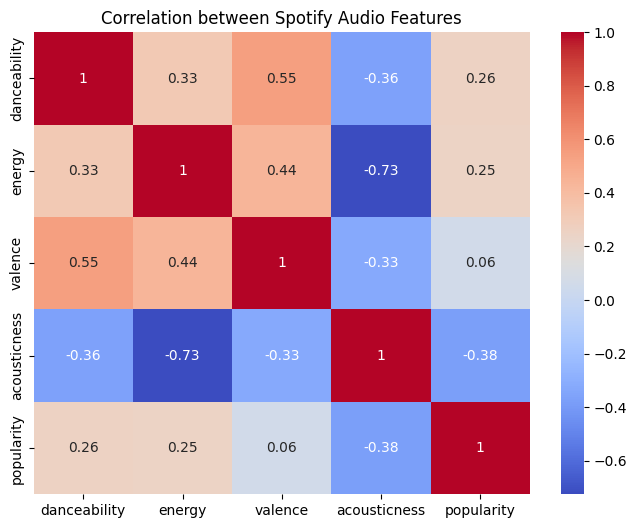

In [17]:
# Heatmap of correlations
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation between Spotify Audio Features")
plt.show()